<H1> Lab 7 </H1>

<H2> Function block </H2>

<H3>
Draw plot
</H3>

In [7]:


from re import A
from xml.etree.ElementTree import QName
import numpy as np
import math
import matplotlib.pyplot as plt
from sympy import Symbol, lambdify, diff, derive_by_array
from scipy import optimize
import pandas as pd

def plpl(foo, x: list[float],y: list[float]) -> list[float]:
    c =[]
    tmp = [1,1]
    for i in range(len(x)):
        #print(i)
        if i > 0:
            if c[-1] != foo(x[i],y[i]):     
                c.append(foo(x[i],y[i]))
        else:
            c.append(foo(x[i],y[i]))
    #с = set(c)
    #c.sort()
    #print(c)
    return c

def plpl1(foo, x: list[float],y: list[float]) -> list[float]:
    c =[]
    tmp = [1,1]
    for i in range(len(x)):
        #print(i)
        
        c.append(foo(x[i],y[i]))
    #с = set(c)
    #c.sort()
    #print(c)
    return c

def draw_counterplot(x_min, xk, flag, foo):
    fig, ax = plt.subplots(figsize = (5,5))

    x, y = np.linspace(min(xk[0]) - 1/2, max(xk[0]) + 1/2), np.linspace(min(xk[1]) - 1/2, max(xk[1]) + 1/2)
    
    x, y = np.meshgrid(x ,y)
    
    z = foo(x,y)

    v = plpl(foo, xk[0], xk[1])
    v.sort()
    #print(v)
    # построим линии уровня
    ax.contour(x, y, z, levels = v)
    # траектория поиска точки минимума
    ax.plot(xk[0], xk[1], marker='o', markersize = 3, color = 'red')
    # подписи к осям
    ax.set_xlabel('$x$', fontsize = 12)
    ax.set_ylabel('$y$', fontsize = 12)
    #ax.set_title('Линии уровня и траектория поиска точки' , fontdict = {'fontsize' : 14})

    # создадим сетку 
    ax.grid(linestyle = '-')



    pass


def draw_plot(xk, foo, levels_mas):
    fig, ax = plt.subplots(figsize = (5,5))

    x, y = np.linspace(min(xk[0]) - 1/2, max(xk[0]) + 1/2), np.linspace(min(xk[1]) - 1/2, max(xk[1]) + 1/2)
    
    x, y = np.meshgrid(x ,y)
    
    z = foo(x,y)
    v = plpl(foo, levels_mas[0], levels_mas[1])
    v = list(set(v))

    v.sort()
    #print(v)
    # построим линии уровня
    ax.contour(x, y, z, levels = v)
    # траектория поиска точки минимума
    ax.plot(xk[0], xk[1], marker='o', markersize = 3, color = 'red')
    # подписи к осям
    ax.set_xlabel('$x$', fontsize = 12)
    ax.set_ylabel('$y$', fontsize = 12)
    #ax.set_title('Линии уровня и траектория поиска точки' , fontdict = {'fontsize' : 14})

    # создадим сетку 
    ax.grid(linestyle = '-')



    pass

def draw_counterplot1(x_min, xk, A, flag, foo):
    fig, ax = plt.subplots(figsize = (5,5))

    x, y = np.linspace(min(xk[0]) - 1/2, max(xk[0]) + 1/2), np.linspace(min(xk[1]) - 1/2, max(xk[1]) + 1/2)
    
    x, y = np.meshgrid(x ,y)
    
    z = foo(x,y)

    v = plpl(foo, xk[0], xk[1])
    v = list(set(v))
    v.sort()

    #print(v)
    # построим линии уровня
    ax.contour(x, y, z, levels = v)
    # траектория поиска точки минимума
    ax.plot(xk[0], xk[1], marker='o', markersize = 3, color = 'red')

    for k in range(1,len(A[0])):
        
        ax.plot ([A[0][k-1],A[0][k]], [A[1][k-1],A[1][k]], marker='o', markersize = 3, color = 'green')
        #ax.plot (A[0][k], A[1][k], marker='o', markersize = 3, color = 'green')


    # подписи к осям
    ax.set_xlabel('$x$', fontsize = 12)
    ax.set_ylabel('$y$', fontsize = 12)
    #ax.set_title('Линии уровня и траектория поиска точки' , fontdict = {'fontsize' : 14})

    # создадим сетку 
    ax.grid(linestyle = '-')



    pass

def draw_all(x0, x_min, xk, flag, foo, ang_a = 20, ang_b = 145):

    fig = plt.figure(figsize = (15, 5), dpi=120)

    ax1 = fig.add_subplot(1, 2, 1, projection='3d')
    ax2 = fig.add_subplot(1, 2, 2)
    #ax3 = fig.add_subplot(1, 3, 3)
    plt.subplots_adjust(wspace=0.7)

    coef = max(abs(x0[0] - x_min[0]), abs(x0[1]-x_min[1]))
    #coef = max(abs( min(xk[0]) - x_min[0]), abs(min(xk[1])-x_min[1]))
    x, y = np.meshgrid(np.linspace(x_min[0] - coef, x_min[0] + coef, 100),np.linspace(x_min[1] - coef, x_min[1] + coef, 100))
    z = foo(x, y)

    v = plpl(foo, xk[0], xk[1])
    v.sort()
    

    ax1.plot_surface(x,y,z, cmap = 'plasma', alpha = 0.5)
    ax1.contour3D(x,y,z, 120, cmap = 'plasma', alpha = 0.3)
    ax1.contour3D(x,y,z, levels = v, colors = 'black', alpha = 0.5) #cmap = 'tab20')

    v = plpl1(foo, xk[0], xk[1])
    
    ax1.plot(xk[0], xk[1], v, marker='o', markersize = 3, color = 'red')

    ax1.scatter(xk[0][0], xk[1][0], foo(xk[0][0], xk[1][0]), s = 20, c = 'green', label="$x_{beg}$ - точка начального приближения")
    ax1.scatter(x_min[0], x_min[1], foo(x_min[0], x_min[1]), s = 20, c = 'red', label="$x_{min}$ - точка минимума")
    ax1.legend(shadow=True, fontsize=8)
    ax1.view_init(ang_a, ang_b)
    ax1.set_xlabel('$x$', fontsize = 12)
    ax1.set_ylabel('$y$', fontsize = 12)
    ax1.set_zlabel('$z$', fontsize = 12)
    ax1.set_title('График поверхности функции', fontdict = {'fontsize' : 14})


    #x, y = np.meshgrid(xk[0], xk[1])
    x, y = np.linspace(min(xk[0]) - 1/2, max(xk[0]) + 1/2), np.linspace(min(xk[1]) - 1/2, max(xk[1]) + 1/2)
    
    x, y = np.meshgrid(x ,y)
    
    z = foo(x,y)

    v = plpl(foo, xk[0], xk[1])
    v.sort()
    # построим линии уровня
    ax2.contour(x, y, z, v)
    # траектория поиска точки минимума
    ax2.plot(xk[0], xk[1], marker='o', markersize = 3, color = 'red')
    # подписи к осям
    ax2.set_xlabel('$x$', fontsize = 12)
    ax2.set_ylabel('$y$', fontsize = 12)
    ax2.set_title('Линии уровня и траектория поиска точки' , fontdict = {'fontsize' : 14})

    # создадим сетку 
    ax2.grid(linestyle = '-')

    # k = range(len(w_norm))
    # #x, y = np.meshgrid(k , w_norm)
    # ax3.plot(k, w_norm)
    # ax3.set_xlabel('$k$')
    # ax3.set_ylabel('$ \| \! \| w_k \| \! \| $')
    # ax3.set_title('Зависимость нормы \n антиградиента $ \| \! \| w_k \| \! \| $ от параметра $k$')



    pass




<H3> Golden Ratio </H3>

In [2]:
import numpy as np
import math
eps = 10**(-2)
def method_goldenRatio(f, b: float = 1, a: float = 0, e = eps * 1e-1):
    tau = (math.sqrt(5) + 1) / 2
    n_f = 0
    Ak, Bk = a, b
    lk = Bk - Ak
    Xk1 = Bk - (Bk - Ak) / tau
    Xk2 = Ak + (Bk - Ak) / tau
    
    y1, y2 = f(Xk1), f(Xk2)
    n_f += 2

    while lk >= e:
        if y1 < y2:
            Bk = Xk2
            Xk2 = Xk1
            Xk1 = Ak + Bk - Xk2
            y2 = y1
            y1 = f(Xk1)
            n_f += 1 
        else:
            
            Ak = Xk1
            Xk1 = Xk2
            Xk2 = Ak + Bk - Xk1
            y1 = y2
            y2 = f(Xk2)
            n_f += 1
            
        lk = Bk - Ak
    return (Ak + Bk) / 2, n_f


<H3> Simplex optimization

In [3]:
from cmath import sqrt
import numpy as np
import math
import matplotlib.pyplot as plt
from sympy import Symbol, lambdify, diff, derive_by_array
from scipy import optimize

x0 = [-1, -2]
e = 10 ** (-16)
def vec_rav(a, b) -> bool:
    for i in range(len(a)):
        if a[i] != b[i]:
            return False
    return True
    
def lab7_methods(foo, eps = e, x = np.array(x0), flag: int = 0, flag1: int = 0, n_dim: int = 2):

    n_f = 0
    n_g = 0
    n_d = 0


    x = np.array(x)
    # x_, y_ = Symbol('x'), Symbol('y')
    # grad_f = lambdify((x_, y_), derive_by_array(foo(x_, y_), (x_, y_)), 'numpy')    
    
    f = lambda x: foo(x[0], x[1])

    # grad = lambda x: grad_f(x[0], x[1])
    # anti_grad = lambda x: np.array(-grad_f(x[0], x[1]))

    xk = [[],[]]
    xk[0].append(x[0])
    xk[1].append(x[1])

    # basis = np.identity(n_dim)

    #b = np.array([1/2, 1/2])
    

    #basis_iter_mas = [[],[]]
    #fj = f(x)
    #pk = np.copy(basis)
    
    
    n = n_dim 
    

    # регулярный симплекс
    delta = 0.5
    
    x_simplex = np.zeros((n+1, n))
    L = 2

    
    for i in range(n+1):
        for j in range(n):
            if j < i - 1:
                x_simplex[i][j] = x[j]
            elif j == i - 1:
                x_simplex[i][j] = x[j] + L * sqrt((j+1)/2/(j+2))
            else:
                x_simplex[i][j] = x[j] - L / sqrt(2*(j+1)*(j+2))
    

    print(x_simplex)

    f_simplex = []#np.array([])
    max_j = 0
    for i in range(n+1):
        f_simplex.append(f(x_simplex[i]))
        if i > 0:
            if f_simplex[max_j] < f_simplex[i]:
                max_j = i

    x_c = np.zeros(2)

    while True:
        n_d += 1  
        
        if flag == 1:
            
            for i in range(n+1):
                if i != max_j:
                    x_c += x_simplex[i]
            
            x_c = x_c / (n)

            x_next = 2 * x_c - x_simplex[max_j]

            f_next = f(x_next)
            

            if f_next < f_simplex[max_j]:

                x_simplex[max_j] = x_next
                f_simplex[max_j] = f_next

                for i in range(n+1):
                    if i > 0:
                        if f_simplex[max_j] < f_simplex[i]:
                            max_j = i
        # if flag == 2:
            
        #     for i in range(n+1):
        #         if i != max_j:
        #             x_c += x_simplex[i]
            
        #     x_c = x_c / (n + 1)

        if n_d == 10:
            break   
    # if flag == 1:
    #     return x, xk, basis_iter_mas, n_f, n_d

    return x, xk, n_f, n_d


In [10]:
from cmath import sqrt
import numpy as np
import math
import matplotlib.pyplot as plt
from sympy import Symbol, lambdify, diff, derive_by_array
from scipy import optimize

x0 = [-1, -2]
e = 10 ** (-16)
def vec_rav(a, b) -> bool:
    for i in range(len(a)):
        if a[i] != b[i]:
            return False
    return True


def lab7_methods(foo, eps = e, x = np.array(x0), flag: int = 0, flag1: int = 0, n_dim: int = 2):

    n_f = 0
    n_g = 0
    n_d = 0

    

    x = np.array(x)
    # x_, y_ = Symbol('x'), Symbol('y')
    # grad_f = lambdify((x_, y_), derive_by_array(foo(x_, y_), (x_, y_)), 'numpy')    
    
    f = lambda x: foo(x[0], x[1])

    # grad = lambda x: grad_f(x[0], x[1])
    # anti_grad = lambda x: np.array(-grad_f(x[0], x[1]))

    xk = [[],[]]
    xk[0].append(x[0])
    xk[1].append(x[1])    
    
    levels_mass = [[],[]]

    n = n_dim 
    # регулярный симплекс
    delta = 0.5
    # нерегулярный симплекс
    alpha = 1
    beta = 2
    gamma = 0.5

    
    x_simplex = np.zeros((n+1, n))
    L = 2

    tmp = []
    
    # for i in range(n+1):
    #     for j in range(n):
    #         if j < i - 1:
    #             x_simplex[i][j] = x[j]
    #         elif j == i - 1:
    #             x_simplex[i][j] = x[j] + L * sqrt((j+1)/2/(j+2))
    #         else:
    #             x_simplex[i][j] = x[j] - L / sqrt(2*(j+1)*(j+2))
    x_simplex[0] = np.array(x)
    x_simplex[1] = np.array([x_simplex[0][0] + L * 0.966, x_simplex[0][1] + L * 0.259])
    x_simplex[2] = np.array([x_simplex[0][0] + L * 0.259, x_simplex[0][1] + L * 0.966])

    x_simplex = np.array(sorted(x_simplex, key = lambda x: f(x)))


    xk[0].append(x_simplex[0][0])
    xk[1].append(x_simplex[0][1])
    xk[0].append(x_simplex[1][0])
    xk[1].append(x_simplex[1][1])
    xk[0].append(x_simplex[2][0])
    xk[1].append(x_simplex[2][1])
    xk[0].append(x_simplex[0][0])
    xk[1].append(x_simplex[0][1])
    
    while True:

        n_d += 1  
        
        if flag == 0:
            
            x_temp = x_simplex[2] + 2 * (x_simplex[0] - x_simplex[2]) + (x_simplex[1] - x_simplex[0])

            if f(x_temp) < f(x_simplex[2]):
                n_f += 2
                x_simplex[2] = x_temp

                xk[0].append(x_simplex[0][0])
                xk[1].append(x_simplex[0][1])
                xk[0].append(x_simplex[1][0])
                xk[1].append(x_simplex[1][1])
                xk[0].append(x_simplex[2][0])
                xk[1].append(x_simplex[2][1])
                xk[0].append(x_simplex[0][0])
                xk[1].append(x_simplex[0][1])
    
            else:

                x_temp = x_simplex[1] + 2 * (x_simplex[0] - x_simplex[1]) + (x_simplex[2] - x_simplex[0])

                if f(x_temp) < f(x_simplex[1]):
                    n_f += 2
                    x_simplex[1] = x_temp

                    xk[0].append(x_simplex[0][0])
                    xk[1].append(x_simplex[0][1])
                    xk[0].append(x_simplex[1][0])
                    xk[1].append(x_simplex[1][1])
                    xk[0].append(x_simplex[2][0])
                    xk[1].append(x_simplex[2][1])
                    xk[0].append(x_simplex[0][0])
                    xk[1].append(x_simplex[0][1])

                else:
                    x_temp = x_simplex[0] + 2 * (x_simplex[1] - x_simplex[0]) + (x_simplex[2] - x_simplex[1])

                    if f(x_temp) < f(x_simplex[0]):
                        n_f += 2
                        x_simplex[0] = x_temp

                        xk[0].append(x_simplex[1][0])
                        xk[1].append(x_simplex[1][1])
                        xk[0].append(x_simplex[0][0])
                        xk[1].append(x_simplex[0][1])
                        xk[0].append(x_simplex[2][0])
                        xk[1].append(x_simplex[2][1])
                        xk[0].append(x_simplex[1][0])
                        xk[1].append(x_simplex[1][1])

                    else:
                        L *= delta 
                        x_simplex[1] = x_simplex[0] + delta * (x_simplex[1] - x_simplex[0])
                        x_simplex[2] = x_simplex[0] + delta * (x_simplex[2] - x_simplex[0])
                        xk[0].append(x_simplex[0][0])
                        xk[1].append(x_simplex[0][1])
                        xk[0].append(x_simplex[1][0])
                        xk[1].append(x_simplex[1][1])
                        xk[0].append(x_simplex[2][0])
                        xk[1].append(x_simplex[2][1])
                        xk[0].append(x_simplex[0][0])
                        xk[1].append(x_simplex[0][1])
            
            x_simplex = np.array(sorted(x_simplex, key = lambda x: f(x)))       
            #print(x_simplex, "\n")
            if L < eps:                
                break

            x_c = np.zeros(2)
            for i in x_simplex:
                x_c += i
            x_c /= 3

            #tmp.append(list(x_c))
            #print(type(x_c[0]))
            levels_mass[0].append(x_c[0])
            levels_mass[1].append(x_c[1])

            

        elif flag == 1:

            x_c = np.zeros(2)
            for i in x_simplex:
                x_c += i
            x_c /= 3

            if n_d % 8 == 0:
                
                x_simplex = np.array(sorted(x_simplex, key = lambda x: f(x)))
                L = sqrt( (x_simplex[0][0] - x_simplex[1][0] )**2 +  (x_simplex[0][1] - x_simplex[1][1] )**2 )
                
                x31 =  x_simplex[0].copy()
                x32 =  x_simplex[0].copy()
                #print(x31, x32)
                
                x31[0] += (x_simplex[1][0] - x_simplex[0][0]) * 1/2 - (x_simplex[1][1] - x_simplex[0][1]) * sqrt(3)/2
                x31[1] += (x_simplex[1][0] - x_simplex[0][0]) * sqrt(3)/2 + (x_simplex[1][1] - x_simplex[0][1]) * 1/2
                x32[0] += (x_simplex[1][0] - x_simplex[0][0]) * 1/2 + (x_simplex[1][1] - x_simplex[0][1]) * sqrt(3)/2
                x32[1] += - (x_simplex[1][0] - x_simplex[0][0]) * sqrt(3)/2 - (x_simplex[1][1] - x_simplex[0][1]) * 1/2   

                x_simplex[2] = np.array(sorted([x31, x32], key = lambda x: f(x)))[0]
                
                xk[0].append(x_simplex[0][0])
                xk[1].append(x_simplex[0][1])
                xk[0].append(x_simplex[1][0])
                xk[1].append(x_simplex[1][1])
                xk[0].append(x_simplex[2][0])
                xk[1].append(x_simplex[2][1])
                xk[0].append(x_simplex[0][0])
                xk[1].append(x_simplex[0][1])

                x_simplex = np.array(sorted(x_simplex, key = lambda x: f(x))) 
            
            else:
                x_temp = []
                x_temp.append((1+alpha)/2 * (x_simplex[0] + x_simplex[1]) - alpha*x_simplex[2])
                x_temp.append((1-beta)/2 * (x_simplex[0] + x_simplex[1]) + beta*x_temp[0])
                x_temp.append((1-gamma)/2 * (x_simplex[0] + x_simplex[1]) + gamma*x_temp[0])
                x_temp.append((1-gamma)/2 * (x_simplex[0] + x_simplex[1]) + gamma * x_simplex[2])

                x_temp = np.array(sorted(x_temp, key = lambda x: f(x)))[0]
                
                n_f += 4
                
                if f(x_temp) < f(x_simplex[2]):
                    x_simplex[2] = x_temp
                    n_f += 2

                else:
                    x_simplex[1] = x_simplex[0] + delta * (x_simplex[1] - x_simplex[0])
                    x_simplex[2] = x_simplex[0] + delta * (x_simplex[2] - x_simplex[0])
                
                
                xk[0].append(x_simplex[0][0])
                xk[1].append(x_simplex[0][1])
                xk[0].append(x_simplex[1][0])
                xk[1].append(x_simplex[1][1])
                xk[0].append(x_simplex[2][0])
                xk[1].append(x_simplex[2][1])
                xk[0].append(x_simplex[0][0])
                xk[1].append(x_simplex[0][1])

                x_simplex = np.array(sorted(x_simplex, key = lambda x: f(x)))  

                n_f += 4

                if 1/3 * ( (f(x_simplex[0]) - f(x_c)) ** 2 + (f(x_simplex[1]) - f(x_c)) ** 2 + (f(x_simplex[2]) - f(x_c)) ** 2 ) < eps**2 :
                    break


                x_c = np.zeros(2)
                for i in x_simplex:
                    x_c += i
                x_c /= 3

                #tmp.append(list(x_c))
                #print(type(x_c[0]))
                levels_mass[0].append(x_c[0])
                levels_mass[1].append(x_c[1])
                
    # tmp = list(set(tmp))
    # levels_mass = [[],[]]
    # for k in tmp:
    #     levels_mass[0].append(k[0])
    #     levels_mass[1].append(k[1])
        
    # x_c = np.zeros(2)
    # for i in x_simplex:
    #     x_c += i
    # x_c /= 3
    # if flag == 1:
    #     return x, xk, basis_iter_mas, n_f, n_d
    return x_c, xk, n_f, n_d, levels_mass


In [5]:
from functools import reduce
import numpy as np
B = np.array([[1/2, 0], [-1 , 0]])#
C = np.array([1/2,-1])
R = np.array([1/2,1])
#print(np.dot(C, B), np.dot(B.T, C))
#print(B.dot(B.T))
#r = np.ones(2, 4)
#print(r)
#x = np.zeros(2)
basis = []
print(type(basis))

n_dim = 2
# for i in range(n_dim):
#         e = [0] * (n_dim - 1)
#         e.insert(i, 1)
#         basis.append(np.array(e))

basis = np.identity(n_dim)
print(basis[0])
print(vec_rav(C, R))
b = np.array([2, 3])
b = 0.8 * b 
# 

#print(np.dot(C, T))
#np.matrix.transpose(C)

y = np.copy(C)
#y = C

y[1] = 0

for i in range(1,3+1):
    print(i)

n = 2
x_simplex = np.zeros((3, 2))
print(x_simplex)


<class 'list'>
[1. 0.]
False
1
2
3
[[0. 0.]
 [0. 0.]
 [0. 0.]]


<H3> Print function </H3>

In [39]:
from sympy import Symbol, lambdify, diff, derive_by_array
from scipy import optimize
import math

#x0 = [-1,-2]
def print_res(foo, x0 = x0, e_help = 2, flag = 0, flag1 = 0):

    #tabledata = []

    x_, y_ = Symbol('x'), Symbol('y')
    eps = 10**(-e_help)

    print("\n", ' ' * 30, "Мтоды покоординатного спуска","\n")
    print("Дано:")
    print("-" * 24)
    print("      Целевая функция:    f(x, y) =", foo(x_,y_))
    print("Начальное приближение:    (x, y) =", x0)
    print(" Точность приближения:    eps =", eps)
    print("-" * 24)

    for i in range (2):
        #temp = []
        #print("\n" + "_" * 80)

        if i == 0:
            method_name = "Регулярный симплекс"
            print("\n", ' ' * 30, f"{method_name} \n")
        elif i == 1:
            method_name = "Нерегулярный симплекс"
            print("\n", ' ' * 30, f"{method_name} \n")
        # elif i == 2:
        #     method_name = "Метод Розенброка"
        #     print("\n", ' ' * 30, f"{method_name} \n")
        
        
        #x_min, xk, w_norm, n_f, n_g , n_d = straight_optimization(foo, eps, x0, i, flag1)
        x_min, xk, n_f, n_d, levels_mass = lab7_methods(foo, eps, x0, i)
        
        print("             Точка минимума функции:     x_min =", [round(x_min[0], e_help), round(x_min[1], e_help)])
        print("  Значение функции в точке минимума:  f(x_min) =", round(foo(x_min[0], x_min[1]), e_help))
        print("                Количество итераций:         k =",   n_d)#len(w_norm) - 1)
        print("      Количество вычислений функции:       n_f =", n_f)
        #print("  Количество вычисленных градиентов:       n_g =", n_g)
        #print("Количество вычисленных матриц Гессе:    n_hess =", n_hess)
        draw_plot(xk, foo, levels_mass)
        
        

        #print(xk)
        #draw_counterplot_only(x_min, xk, w_norm, i, fk)
        plt.show()
    
    #a = print_tables(tabledata)


    pass



[0.65919792 0.43351042] 0.1162258558135526 19 22

                                Мтоды покоординатного спуска 

Дано:
------------------------
      Целевая функция:    f(x, y) = (x - 1)**2 + 75*(x**2 - y)**2
Начальное приближение:    (x, y) = [-2  1]
 Точность приближения:    eps = 0.01
------------------------

                                Регулярный симплекс 

             Точка минимума функции:     x_min = [0.66, 0.43]
  Значение функции в точке минимума:  f(x_min) = 0.12
                Количество итераций:         k = 19
      Количество вычислений функции:       n_f = 22


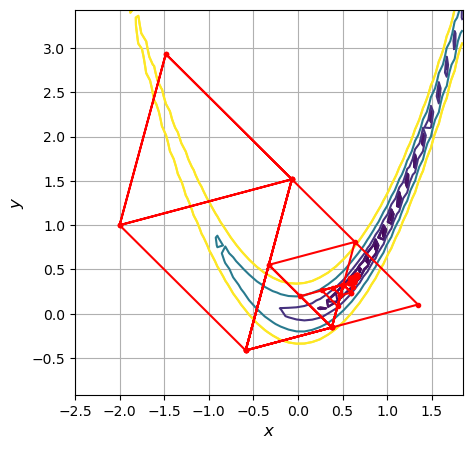


                                Нерегулярный симплекс 

             Точка минимума функции:     x_min = [0.4, 0.15]
  Значение функции в точке минимума:  f(x_min) = 0.37
                Количество итераций:         k = 43
      Количество вычислений функции:       n_f = 380


/tmp/ipykernel_119337/3080685996.py:178: ComplexWarning: Casting complex values to real discards the imaginary part
  x31[0] += (x_simplex[1][0] - x_simplex[0][0]) * 1/2 - (x_simplex[1][1] - x_simplex[0][1]) * sqrt(3)/2
/tmp/ipykernel_119337/3080685996.py:179: ComplexWarning: Casting complex values to real discards the imaginary part
  x31[1] += (x_simplex[1][0] - x_simplex[0][0]) * sqrt(3)/2 + (x_simplex[1][1] - x_simplex[0][1]) * 1/2
/tmp/ipykernel_119337/3080685996.py:180: ComplexWarning: Casting complex values to real discards the imaginary part
  x32[0] += (x_simplex[1][0] - x_simplex[0][0]) * 1/2 + (x_simplex[1][1] - x_simplex[0][1]) * sqrt(3)/2
/tmp/ipykernel_119337/3080685996.py:181: ComplexWarning: Casting complex values to real discards the imaginary part
  x32[1] += - (x_simplex[1][0] - x_simplex[0][0]) * sqrt(3)/2 - (x_simplex[1][1] - x_simplex[0][1]) * 1/2


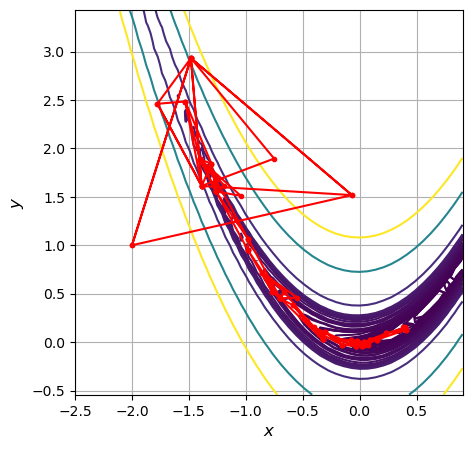

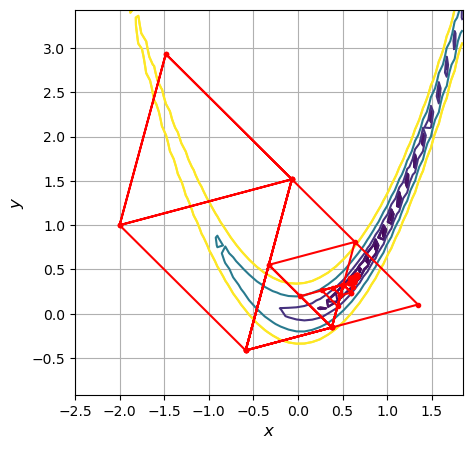

In [40]:
import numpy as np
import math

alpha = 75
foo = lambda x, y: alpha * (x**2 - y)**2 + (x - 1)**2
#foo = lambda x, y: 5*x**2 + 4* x * y + 2 * y**2 + 4 * math.sqrt(5) * (x +  y) -35
#foo = lambda x, y: 6*x**2 - 4* x * y + 3 * y**2 + 4 * math.sqrt(5) * (x +  2* y) +22
# h = lambdify((x_, y_), [[diff(foo(x_, y_), x_, 2), diff(foo(x_, y_), x_, y_)], [diff(foo(x_, y_), y_, x_), diff(foo(x_, y_), y_, 2)]], 'numpy')
# H = lambda x: np.array(h(x[0],x[1]))

x0 = np.array([-2, 1])

#print_res(foo,x0, 2, )
#print_res(foo, x0, 3, 1)

#eps = 0.01
x_min, xk,  n_f, n_d, levels_mass = lab7_methods(foo, 0.01, x0, 0)

print(x_min, foo(x_min[0], x_min[1]), n_d, n_f)

print_res(foo, x0, 2, 0)
#print(levels_mass)
#draw_all(x0, x_min, xk, 0, foo, 30, -20)
draw_plot(xk, foo, levels_mass)
#print(xk)
#draw_counterplot(x_min, xk, 1, foo)
#draw_all(x0, x_min, xk, w_norm, 0, foo, 45, 170)

#print(xk)
# alpha = 200
# foo = lambda x, y: alpha * (x**2 - y)**2 + (x - 1)**2

# print_res(foo, x0, 2)


<H3> Make pandas.DateFrame </H3>

In [21]:
import pandas as pd

def make_df(tabledata) -> pd.DataFrame:
        df = pd.DataFrame(tabledata, columns = ['Тип функции', 'Начальная точка', 'Точность', 'Метод', 'Точка минимума функции', 'Значение функции в точке минимума', 'Количество итераций', 'Количество вычислений функции'])#, 'Количество вычисленных градиентов']) #, 'Количество вычисленных матриц Гессе' ])
        return df

<H3> Make sheets</H3>

In [82]:

from sympy import Symbol, lambdify, diff, derive_by_array
from scipy import optimize

#x0 = [-1,-2]
def make_sheets(foo, f_type, x0_mass = [[-1, -2]],  e_help = 2, tabledata = [], extra = -1):

    nu = 0.8
    omega = 0.5
    eps = 10**(-e_help)
    x0 = x0_mass[0]

    if f_type == 0:
        func_name = 'Квадратичная функция'
        flag = 0
    else:
        func_name = 'Функция Розенброка'
        flag = 1
        if extra != -1:
            flag = 0
    

    for j in range(len(x0_mass)):
        
        x0 = x0_mass[j]
        
        for i in range (2):
            
            if i == 0:
                method_name = "Регулярный симплекс"
                
            elif i == 1:
                method_name = "Нерегулярный симплекс"
            # elif i == 2:
            #     method_name = "Метод Розенброка"
                
            x_min, xk, n_f, n_d, levels_mass  = lab7_methods(foo, eps, x0, i)
            
            temp = [func_name, x0, round(eps, e_help), method_name, [ round(x_min[0], e_help), round(x_min[1], e_help)], round(foo(x_min[0], x_min[1]), e_help), n_d, n_f] 
            tabledata.append(temp)
            
    return tabledata

<H2>
Calculations
</H2>

<H3> Sheets </H3>


In [87]:
from secrets import randbelow
from tkinter import font


styles = [dict(selector="caption", props=[("text-align", "center"), ("font-size", "150%")])]

e_help = 2

x0 = [[-5, 6]]
x0_mass = [[-1,-2], [0,0], [-2,5], [-10, 1], [10,10]]

#foo = lambda x, y: 5*x**2 + 4* x * y + 2 * y**2 + 4 * math.sqrt(5) * (x +  y) -35

foo = lambda x, y: 5*x**2 + 4* x * y + 2 * y**2 + 4 * math.sqrt(5) * (x +  y) -35
tabledata1 = []
for i in range(2):
    if i == 0:
        e_help = 2
    else: 
        e_help = 6
    make_sheets(foo, 0, [[-1,-2]], e_help, tabledata1)
alpha = 5
foo = lambda x, y: alpha * (x**2 - y)**2 + (x - 1)**2
for i in range(2):
    if i == 0:
        e_help = 2
    else: 
        e_help = 6
    make_sheets(foo, 1, [[-1,-2]], e_help, tabledata1)
alpha = 50
foo = lambda x, y: alpha * (x**2 - y)**2 + (x - 1)**2
for i in range(2):
    if i == 0:
        e_help = 2
    else: 
        e_help = 6
    make_sheets(foo, 1, [[-1,-2]], e_help, tabledata1)
# Результаты вычислений квадратичной функции в зависимости от начальной точки
#make_sheets(foo, 0, x0_mass, e_help, tabledata1)
df1 = make_df(tabledata1)


alpha = 5
foo = lambda x, y: alpha * (x**2 - y)**2 + (x - 1)**2
tabledata2 = [] # Результаты вычислений функции Розенброка в зависимости от начальной точки
make_sheets(foo, 1, x0_mass, e_help, tabledata2)
df2 = make_df(tabledata2)


alpha = 50
foo = lambda x, y: alpha * (x**2 - y)**2 + (x - 1)**2
tabledata2 = [] # Результаты вычислений функции Розенброка в зависимости от начальной точки
make_sheets(foo, 1, x0_mass, 2, tabledata2)
df3 = make_df(tabledata2)

alpha = 50
foo = lambda x, y: alpha * (x**2 - y)**2 + (x - 1)**2
tabledata3 = [] # Результаты вычислений функции Розенброка в зависимости от заданной точности

for i in range(2):
    if i == 0:
        e_help = 3
    else: 
        e_help = 6
    make_sheets(foo, 1, [[-1,-2]], e_help, tabledata3)

df4 = make_df(tabledata3)


/tmp/ipykernel_119337/3080685996.py:178: ComplexWarning: Casting complex values to real discards the imaginary part
  x31[0] += (x_simplex[1][0] - x_simplex[0][0]) * 1/2 - (x_simplex[1][1] - x_simplex[0][1]) * sqrt(3)/2
/tmp/ipykernel_119337/3080685996.py:179: ComplexWarning: Casting complex values to real discards the imaginary part
  x31[1] += (x_simplex[1][0] - x_simplex[0][0]) * sqrt(3)/2 + (x_simplex[1][1] - x_simplex[0][1]) * 1/2
/tmp/ipykernel_119337/3080685996.py:180: ComplexWarning: Casting complex values to real discards the imaginary part
  x32[0] += (x_simplex[1][0] - x_simplex[0][0]) * 1/2 + (x_simplex[1][1] - x_simplex[0][1]) * sqrt(3)/2
/tmp/ipykernel_119337/3080685996.py:181: ComplexWarning: Casting complex values to real discards the imaginary part
  x32[1] += - (x_simplex[1][0] - x_simplex[0][0]) * sqrt(3)/2 - (x_simplex[1][1] - x_simplex[0][1]) * 1/2
/tmp/ipykernel_119337/3080685996.py:178: ComplexWarning: Casting complex values to real discards the imaginary part
  

In [79]:
#df1 = df1.sort_values('Тип функции')

df1.style.set_caption('Результаты вычислений квадратичной функции в зависимости от начальной точки').set_table_styles(styles)

,Тип функции,Начальная точка,Точность,Метод,Точка минимума функции,Значение функции в точке минимума,Количество итераций,Количество вычислений функции
0,Квадратичная функция,"[-1, -2]",0.010000,Нерегулярный симплекс,"[-0.0, -2.27]",-45.000000,13,120
1,Квадратичная функция,"[-1, -2]",0.000001,Нерегулярный симплекс,"[0.000462, -2.236667]",-44.999999,28,250
2,Функция Розенброка,"[-1, -2]",0.010000,Нерегулярный симплекс,"[0.83, 0.68]",0.030000,19,170
3,Функция Розенброка,"[-1, -2]",0.000001,Нерегулярный симплекс,"[0.999662, 0.998938]",0.000001,60,530
4,Функция Розенброка,"[-1, -2]",0.010000,Нерегулярный симплекс,"[0.76, 0.57]",0.060000,17,150
5,Функция Розенброка,"[-1, -2]",0.000001,Нерегулярный симплекс,"[0.999118, 0.998338]",0.000001,158,1390


In [26]:
df2 = df2.sort_values('Начальная точка')

df2.style.set_caption('Результаты вычислений функции Розенброка в зависимости от начальной точки, alpha = 5').set_table_styles(styles)

,Тип функции,Начальная точка,Точность,Метод,Точка минимума функции,Значение функции в точке минимума,Количество итераций,Количество вычислений функции
4,Функция Розенброка,"[-2, 5]",0.010000,Регулярный симплекс,"[0.85, 0.72]",0.020000,57,98
5,Функция Розенброка,"[-2, 5]",0.010000,Нерегулярный симплекс,"[0.75, 0.57]",0.060000,36,320
0,Функция Розенброка,"[-1, -2]",0.010000,Регулярный симплекс,"[0.86, 0.74]",0.020000,55,94
1,Функция Розенброка,"[-1, -2]",0.010000,Нерегулярный симплекс,"[0.83, 0.68]",0.030000,19,170
2,Функция Розенброка,"[0, 0]",0.010000,Регулярный симплекс,"[1.07, 1.15]",0.000000,20,24
3,Функция Розенброка,"[0, 0]",0.010000,Нерегулярный симплекс,"[0.88, 0.74]",0.020000,13,120


In [88]:
df3 = df3.sort_values('Начальная точка')

df3.style.set_caption('Результаты вычислений функции Розенброка в зависимости от начальной точки, alpha = 50').set_table_styles(styles)


,Тип функции,Начальная точка,Точность,Метод,Точка минимума функции,Значение функции в точке минимума,Количество итераций,Количество вычислений функции
6,Функция Розенброка,"[-10, 1]",0.010000,Регулярный симплекс,"[0.66, 0.43]",0.120000,27,38
7,Функция Розенброка,"[-10, 1]",0.010000,Нерегулярный симплекс,"[2.98, 8.87]",3.910000,26,228
4,Функция Розенброка,"[-2, 5]",0.010000,Регулярный симплекс,"[-2.86, 8.18]",14.900000,15,14
5,Функция Розенброка,"[-2, 5]",0.010000,Нерегулярный симплекс,"[0.5, 0.24]",0.260000,57,500
0,Функция Розенброка,"[-1, -2]",0.010000,Регулярный симплекс,"[0.57, 0.32]",0.190000,15,14
1,Функция Розенброка,"[-1, -2]",0.010000,Нерегулярный симплекс,"[0.76, 0.57]",0.060000,17,150
2,Функция Розенброка,"[0, 0]",0.010000,Регулярный симплекс,"[0.46, 0.2]",0.300000,51,86
3,Функция Розенброка,"[0, 0]",0.010000,Нерегулярный симплекс,"[0.82, 0.67]",0.030000,26,230
8,Функция Розенброка,"[10, 10]",0.010000,Регулярный симплекс,"[3.09, 9.55]",4.370000,22,28
9,Функция Розенброка,"[10, 10]",0.010000,Нерегулярный симплекс,"[-1.58, 2.52]",6.690000,71,628


In [27]:
df4 = df4.sort_values('Метод')

df4.style.set_caption('Результаты вычислений функции Розенброка в зависимости от заданной точности, а = 50').set_table_styles(styles)

,Тип функции,Начальная точка,Точность,Метод,Точка минимума функции,Значение функции в точке минимума,Количество итераций,Количество вычислений функции
1,Функция Розенброка,"[-1, -2]",0.001000,Нерегулярный симплекс,"[0.762, 0.576]",0.058000,20,180
3,Функция Розенброка,"[-1, -2]",0.000001,Нерегулярный симплекс,"[0.999118, 0.998338]",0.000001,158,1390
0,Функция Розенброка,"[-1, -2]",0.001000,Регулярный симплекс,"[0.763, 0.58]",0.056000,290,558
2,Функция Розенброка,"[-1, -2]",0.000001,Регулярный симплекс,"[0.99964, 0.999279]",0.000000,8078,16114


<H2> Plots </H2>


                                Мтоды покоординатного спуска 

Дано:
------------------------
      Целевая функция:    f(x, y) = 5*x**2 + 4*x*y + 8.94427190999916*x + 2*y**2 + 8.94427190999916*y - 35
Начальное приближение:    (x, y) = [-2, 1]
 Точность приближения:    eps = 1e-06
------------------------

                                Регулярный симплекс 

             Точка минимума функции:     x_min = [1e-06, -2.23607]
  Значение функции в точке минимума:  f(x_min) = -45.0
                Количество итераций:         k = 39
      Количество вычислений функции:       n_f = 36


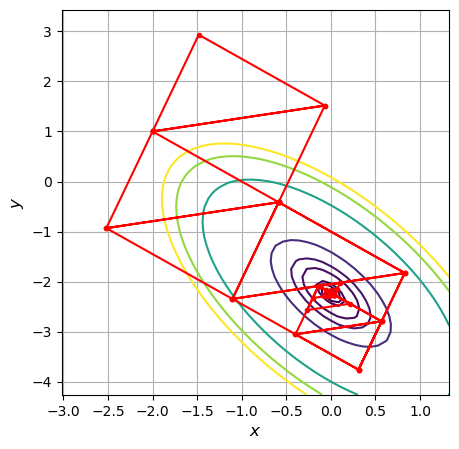


                                Нерегулярный симплекс 

             Точка минимума функции:     x_min = [-0.000144, -2.235923]
  Значение функции в точке минимума:  f(x_min) = -45.0
                Количество итераций:         k = 27
      Количество вычислений функции:       n_f = 240


/tmp/ipykernel_119337/3080685996.py:178: ComplexWarning: Casting complex values to real discards the imaginary part
  x31[0] += (x_simplex[1][0] - x_simplex[0][0]) * 1/2 - (x_simplex[1][1] - x_simplex[0][1]) * sqrt(3)/2
/tmp/ipykernel_119337/3080685996.py:179: ComplexWarning: Casting complex values to real discards the imaginary part
  x31[1] += (x_simplex[1][0] - x_simplex[0][0]) * sqrt(3)/2 + (x_simplex[1][1] - x_simplex[0][1]) * 1/2
/tmp/ipykernel_119337/3080685996.py:180: ComplexWarning: Casting complex values to real discards the imaginary part
  x32[0] += (x_simplex[1][0] - x_simplex[0][0]) * 1/2 + (x_simplex[1][1] - x_simplex[0][1]) * sqrt(3)/2
/tmp/ipykernel_119337/3080685996.py:181: ComplexWarning: Casting complex values to real discards the imaginary part
  x32[1] += - (x_simplex[1][0] - x_simplex[0][0]) * sqrt(3)/2 - (x_simplex[1][1] - x_simplex[0][1]) * 1/2


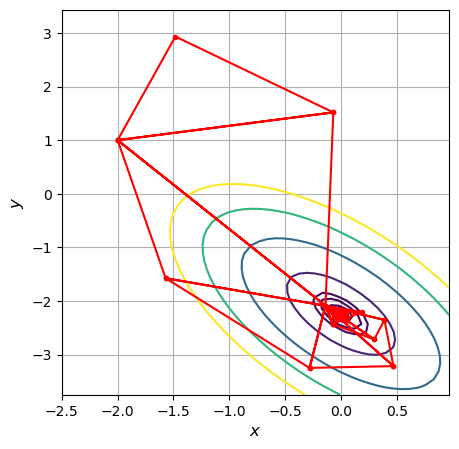


                                Мтоды покоординатного спуска 

Дано:
------------------------
      Целевая функция:    f(x, y) = (x - 1)**2 + 5*(x**2 - y)**2
Начальное приближение:    (x, y) = [-2, 1]
 Точность приближения:    eps = 1e-06
------------------------

                                Регулярный симплекс 

             Точка минимума функции:     x_min = [0.999975, 0.999949]
  Значение функции в точке минимума:  f(x_min) = 0.0
                Количество итераций:         k = 884
      Количество вычислений функции:       n_f = 1726


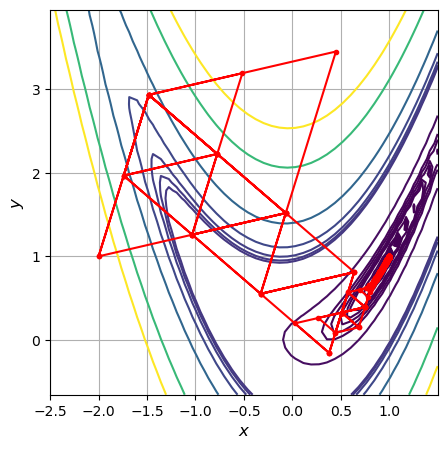


                                Нерегулярный симплекс 

             Точка минимума функции:     x_min = [0.999326, 0.998419]
  Значение функции в точке минимума:  f(x_min) = 1e-06
                Количество итераций:         k = 94
      Количество вычислений функции:       n_f = 830


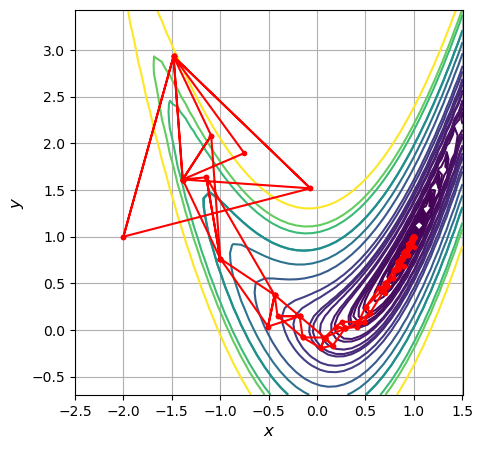


                                Мтоды покоординатного спуска 

Дано:
------------------------
      Целевая функция:    f(x, y) = (x - 1)**2 + 50*(x**2 - y)**2
Начальное приближение:    (x, y) = [-2, 1]
 Точность приближения:    eps = 1e-06
------------------------

                                Регулярный симплекс 

             Точка минимума функции:     x_min = [0.999669, 0.999337]
  Значение функции в точке минимума:  f(x_min) = 0.0
                Количество итераций:         k = 8118
      Количество вычислений функции:       n_f = 16194


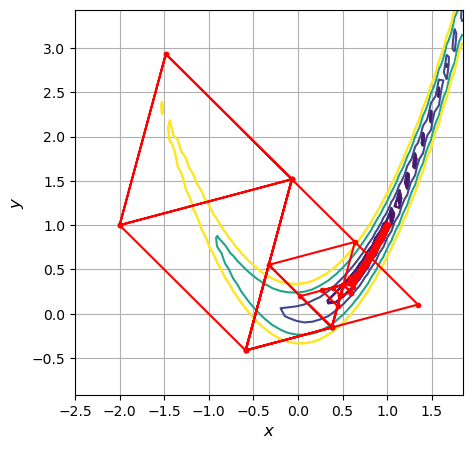


                                Нерегулярный симплекс 

             Точка минимума функции:     x_min = [0.991864, 0.983646]
  Значение функции в точке минимума:  f(x_min) = 6.7e-05
                Количество итераций:         k = 95
      Количество вычислений функции:       n_f = 840


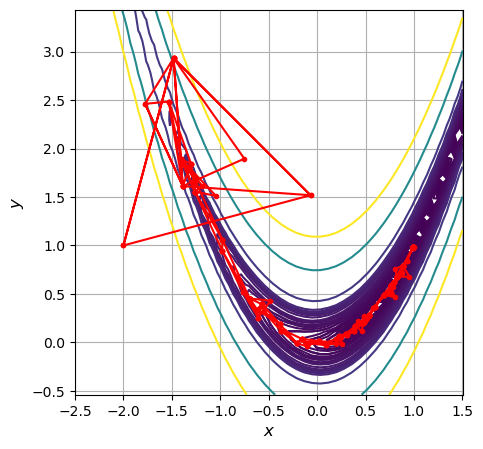

In [90]:
e_help = 6
eps = 10**(-e_help)

x0 = [-2, 1]
#foo = lambda x, y: alpha * (x**2 - y)**2 + (x - 1)**2
foo = lambda x, y: 5*x**2 + 4* x * y + 2 * y**2 + 4 * math.sqrt(5) * (x +  y) -35
print_res(foo, x0, 6, 0)

alpha = 5
foo = lambda x, y: alpha * (x**2 - y)**2 + (x - 1)**2
#foo = lambda x, y: 6*x**2 - 4* x * y + 3 * y**2 + 4 * math.sqrt(5) * (x +  2*y) +22
print_res(foo, x0, 6, 1)

alpha = 50

foo = lambda x, y: alpha * (x**2 - y)**2 + (x - 1)**2
print_res(foo, x0, 6, 1)

#foo = lambda x, y: 6*x**2 - 4* x * y + 3 * y**2 + 4 * math.sqrt(5) * (x +  2*y) +22

#foo = lambda x, y: 10*x**2 - 4* x * y + 7 * y**2 - 4 * math.sqrt(5) * (5*x - y) -16



<H1> Выводы </H1>

В результате выполнения лабораторной работы были реализованы два метода:

• Регулярный симплекс,

• Нерегулярный симплекс (метод Нелдера-Мида).

Во всех методах с заранее заданной точностью были получены точка минимума
и минимальное значение в этой точке.
При поиске точки минимума для квадратичной функции оба методы показывают
хорошие результаты, но эффективнее оказался поиск с помощью регулярного сим-
плекса, так как требовал меньшего количества вычислений функции, так как случае
нерегулярного симплекса много вычислений уходит на одномерную минимизацию.
При поиске точки минимума для функции Розенброка лучшие результаты у метода
нерегулярного симплекса: метод регулярного симплекса требовал меньшего вычисле-
ния функций при малой точности, но при увеличении точности гораздо эффективнее
было использование нерегулярного симплекса.
К плюсами данных методов можно отнести то, что для их реализации не требуется
находить градиенты или матрицы Гесса, а их поиск, в свою очередь, порой является
весьма нетривиальной задачей.